# Analyzing the Election's effects on 911 calls in Pennsylvania

The 2016 election was a tumultuous time for American politics, with scandal after scandal and harsh rhetoric being fired away at excessive rates. With all of this turmoil being present in the nation as a result of this political situation, combined by observing online commentary on social forums, has led us to question whether or not the American population had been negatively affected by this election. To operationalize this, we are using 911 calls as our metric, since a high rate of 911 calls per day would likely mean that the nation underwent some sort of crisis due to this election. We hypothesize that the 2016 election will have had some sort of impact on the amount of 911 calls being made

To start with our analyis, we begin by importing multiple analytical and graphing modules for Python so as to allow us to better study the data.

In [2]:
# NOTE: folium and haversine need to be installed via their respective "pip install <module>" 
# commands and shapefile can be installed via "pip install pyshp" since none of the 3 come with
# the standard Anaconda distribution

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Analytical
import numpy as np
import matplotlib.dates as dates
import time
import pandas as pd

# Graphing
from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import folium
from haversine import haversine
import seaborn as sns
import shapefile
from IPython.core.display import HTML


from time import localtime
from datetime import datetime
from datetime import date
from scipy.stats import normaltest

rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
sns.set(style='whitegrid', context ='paper')

# Data Description - 911.csv

The dataset that we used, 911.csv is a collection of 911 calls from December 10, 2015 to April 13, 2017. It includes details such as when, where, and what type of emergency was called into 911. We will be using this set to find out how many calls there are to make a map of these calls and also to see calls over time This dataset was obtained on https://www.kaggle.com/mchirico/montcoalert 

In [3]:
#Loading in 911 data
df = pd.read_csv('911.csv')

In [4]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


# Data Cleaning
Right now, the data is very messy, with unnecessary columns such as 'e' and null values. Our first goal is to take what we have now and make it more readable. By doing so, we will have a DataFrame that is more easily readable and more easily analyzable

In [5]:
#Keeping all relevant data
df = df[['lat', 'lng', 'zip', 'title', 'timeStamp']]

#Changes name of columns
df.columns = ['Latitude', 'Longitude', 'ZIP code', 'Call Type', 'Date']

Currently, the time portion of the DataFrame is of type String, which is not that useful for data analysis. However, we can convert this to a pandas datetime object, which is much more useful for data analysis

In [6]:
#Turning all string instances of the time to dateTime representations which can be used to graph


for i in range(len(df['Date'])):
    df.set_value(i, 'Date', datetime.strptime(df['Date'][i], "%Y-%m-%d %X").date())

In [7]:
##Getting the type of call made (EMS, Fire, Traffic) 

for i in range(len(df['Call Type'])):
    df.set_value(i, 'Call Type', df['Call Type'][i].split()[0][:len(df['Call Type'][i].split()[0])-1])

In [8]:
#Removing garbage data

df = df.dropna()
df

,Latitude,Longitude,ZIP code,Call Type,Date
0,40.297876,-75.581294,19525.0,EMS,2015-12-10
1,40.258061,-75.264680,19446.0,EMS,2015-12-10
2,40.121182,-75.351975,19401.0,Fire,2015-12-10
3,40.116153,-75.343513,19401.0,EMS,2015-12-10
5,40.253473,-75.283245,19446.0,EMS,2015-12-10
6,40.182111,-75.127795,19044.0,EMS,2015-12-10
7,40.217286,-75.405182,19426.0,EMS,2015-12-10
8,40.289027,-75.399590,19438.0,EMS,2015-12-10
9,40.102398,-75.291458,19462.0,Traffic,2015-12-10
11,40.084161,-75.308386,19428.0,Traffic,2015-12-10


# Data Visualization
So now that we have our data cleaned, lets examine a graphed version of it to see if there are any abnormal spikes

In [9]:
df['Date'].value_counts().head(10)

2016-01-23    801
2016-02-24    604
2016-01-24    589
2016-04-03    519
2016-01-12    517
2017-01-23    517
2016-01-25    505
2016-07-25    505
2016-02-16    488
2017-02-13    480
Name: Date, dtype: int64

In [10]:
#Create a pandas series that gives the number of calls per day from earliest to latest
freqTimes = df['Date'].value_counts()
freqTimes.sort_index(inplace = True)
freqTimes.head(22)

2015-12-10    100
2015-12-11    332
2015-12-12    334
2015-12-13    279
2015-12-14    386
2015-12-15    380
2015-12-16    343
2015-12-17    336
2015-12-18    306
2015-12-19    239
2015-12-20    236
2015-12-21    376
2015-12-22    399
2015-12-23    430
2015-12-24    387
2015-12-25    266
2015-12-26    258
2015-12-27    290
2015-12-28    337
2015-12-29    315
2015-12-30    305
2015-12-31    268
Name: Date, dtype: int64

Now that we know the amount of calls per day, we are able to graph them using MatPlotLib

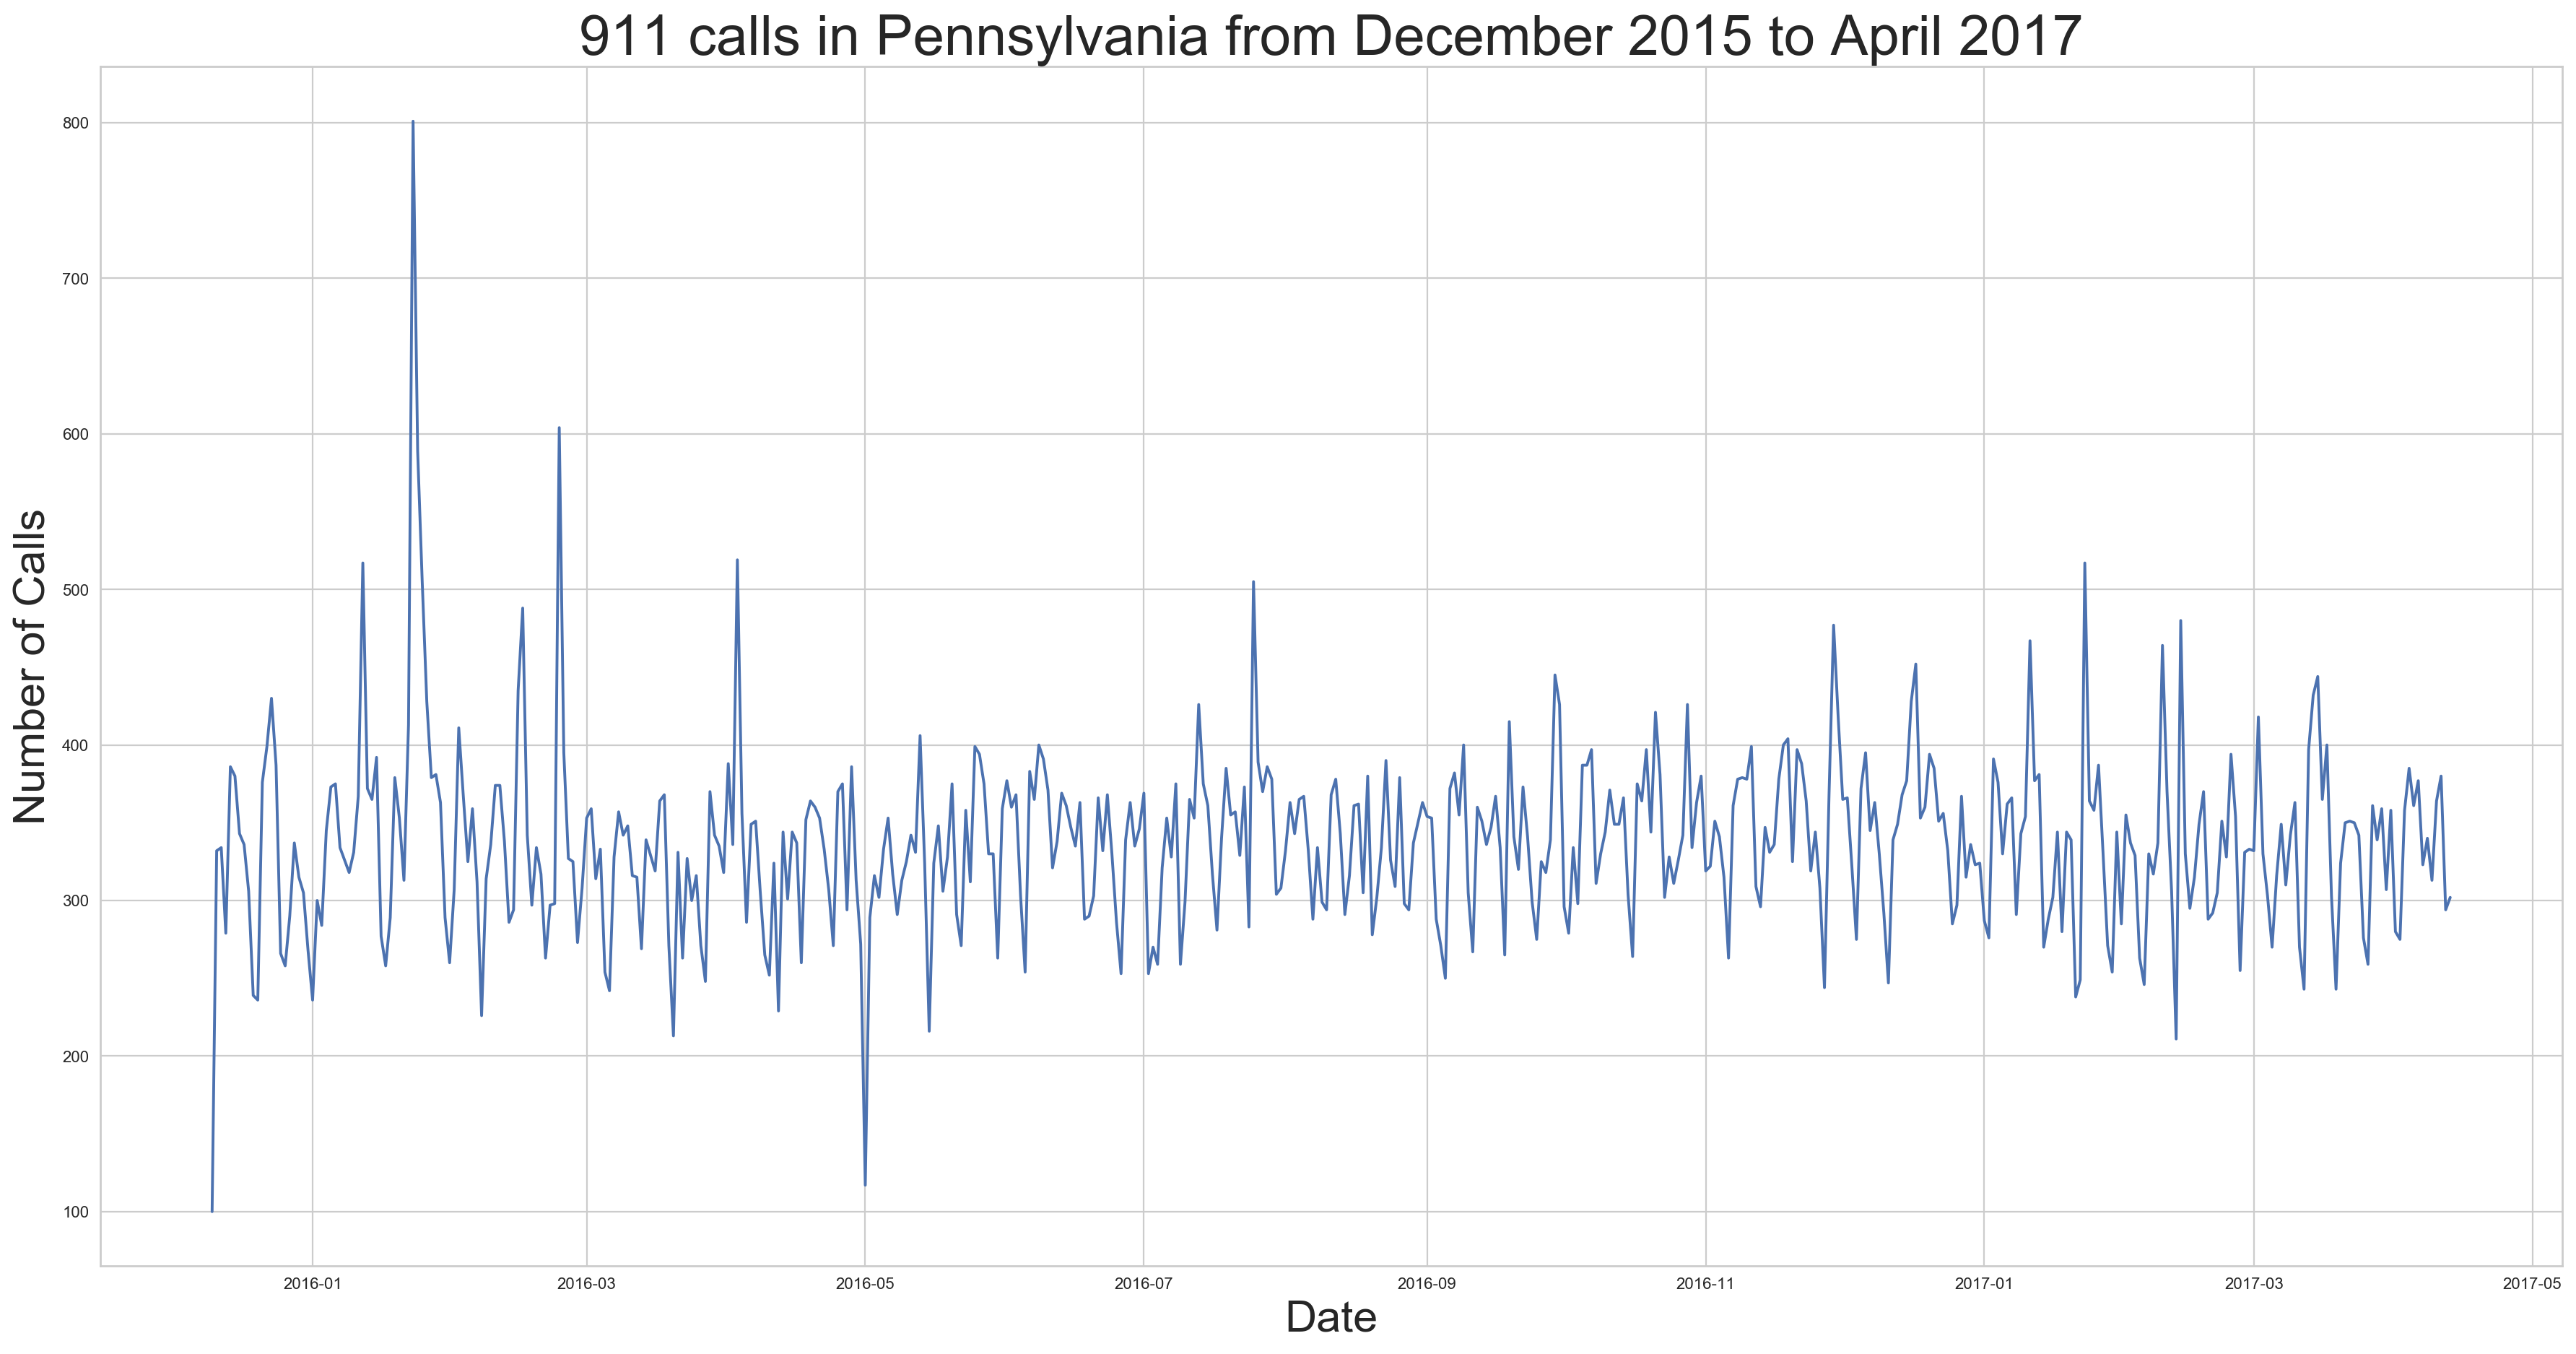

In [11]:
f1 = plt.figure(figsize=(22, 11), dpi=100)


ax = f1.add_subplot(111)
ax.set_xlabel('Date', fontsize = 22)
ax.set_ylabel('Number of Calls', fontsize = 22)
ax.set_title("911 calls in Pennsylvania from December 2015 to April 2017", fontsize = 28)
plt.rc('ytick', labelsize=19)
plt.rc('xtick', labelsize=19)

plt.plot(freqTimes.index, freqTimes)

Looking at the above graph, there are definitely spikes, but are these spikes due to random chance or is there a more significant meaning behind these spikes?

# Graphing

Here, we are going to convert our dataframe to a list and then plot it on 4 different maps. Because of the large amount of data we have, we couldn't plot all the 167000+ sets and we had to resort to plotting 21000. The computers that we are using weren't powerful enough to compute such data size as the disk would always run out of memory and the kernel would crash. 

The following maps show the loction from where the 911 calls were made. It seems like a major number of calls were made from the larger cities highlighted in the fifth map.


In [12]:
df2 = df[['Latitude', 'Longitude']]
numpyMatrix = df2.as_matrix()
country_shape = numpyMatrix
country_shape = country_shape.tolist()

In [13]:
locations = df2[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()

In [14]:
#This map is denoted by the file map1.png in our repo
map1 = folium.Map(location=[40.2, -75.39], zoom_start=12)
for point in range(0, 7000):
    folium.Marker(locationlist[point]).add_to(map1)
map1.save('map1.html')

In [15]:
#This map is denoted by the file map2.png in our repo
map2 = folium.Map(location=[40.29, -75.58], tiles='CartoDB dark_matter', zoom_start=11)

marker_cluster = folium.MarkerCluster().add_to(map2)

for point in range(7000, 14000):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map2.save('map2.html')

In [16]:
#This map is denoted by the file map3.png in our repo
map3 = folium.Map(location=[40.29, -75.58], tiles='Stamen Terrain', zoom_start=11)

marker_cluster = folium.MarkerCluster().add_to(map3)

for point in range(14000, 19000):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map3.save('map3.html')

In [17]:
#This map is denoted by the file map4.png in our repo
map4 = folium.Map(location=[40.29, -75.58], tiles='CartoDB positron', zoom_start=11)

marker_cluster = folium.MarkerCluster().add_to(map4)

for point in range(19000, 25000):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map4.save('map4.html')

Since we couldn't plot all the data sets, we found a range of all the latitudes and longutudes and found out that the differece was about only 2 degrees. 

In [18]:
print(df2['Latitude'].value_counts(), df2['Longitude'].value_counts())

40.133037    1869
40.289027     761
40.107400     571
40.230934     508
40.238724     497
40.168538     461
40.085592     451
40.155060     413
40.140505     409
40.156621     404
40.241320     387
40.141483     345
40.244912     339
39.986694     338
40.258253     338
40.113061     336
40.105890     334
40.137047     328
40.311629     318
40.245673     315
40.103377     308
40.184797     306
40.080913     297
40.114745     290
40.182100     285
39.989898     268
40.124775     262
40.294817     262
40.177272     258
40.247075     257
             ... 
40.214175       1
40.144541       1
40.120520       1
40.348656       1
40.237803       1
40.258058       1
40.074103       1
40.193938       1
40.453790       1
40.251277       1
40.005688       1
40.118188       1
40.159069       1
40.238195       1
40.263477       1
40.108514       1
40.135557       1
40.414966       1
40.077086       1
40.228083       1
40.132232       1
40.127676       1
40.030727       1
40.335116       1
40.206041 

After looking at the data it turns out that the cities with the most 911 calls reported are Philadelphia, Pittaburg, Allentown and Norristown. We are going to plot a graph tracing the locations of these areas in the following map.

In [19]:
Penn_data = shapefile.Reader("ZillowNeighborhoods-PA.dbf")
metadata = Penn_data.shapeRecords()

In [20]:
pa_list = []
counter = 0
for i in range(len(metadata)):
    if metadata[i].record[2] == 'Philadelphia' or 'Pittsburg' or 'Allentown' or 'Norristown':
        pa_list.append(i)
        counter += 1

In [21]:
shapes = Penn_data.shapes()

pa_shapes = []

for i in range(len(pa_list)):
    pa_shapes.append(shapes[pa_list[i]].points)

for i in range(len(pa_shapes)):
    for j in range(len(pa_shapes[i])):
        pa_shapes[i][j] = pa_shapes[i][j][::-1]

In [22]:
#This map is denoted by the file m.png in our repo
m = folium.Map(location=[39.98964600000005, -75.25734199999994], zoom_start = 14, tiles ='Stamen Toner')

for c in range(len(pa_shapes)):
    hood_line = folium.PolyLine(locations=pa_shapes[c], weight=2, color = 'blue')
    m.add_child(hood_line)
m.save('m.html')

# Data Analysis
Now that we have a time series representation of the calls, we are now able to see if there has been any significant differences in the number of calls. We start by determing whether or not the amount of calls per day is normally distributed

Data is not normally distributed. P value: 1.44205673546e-15


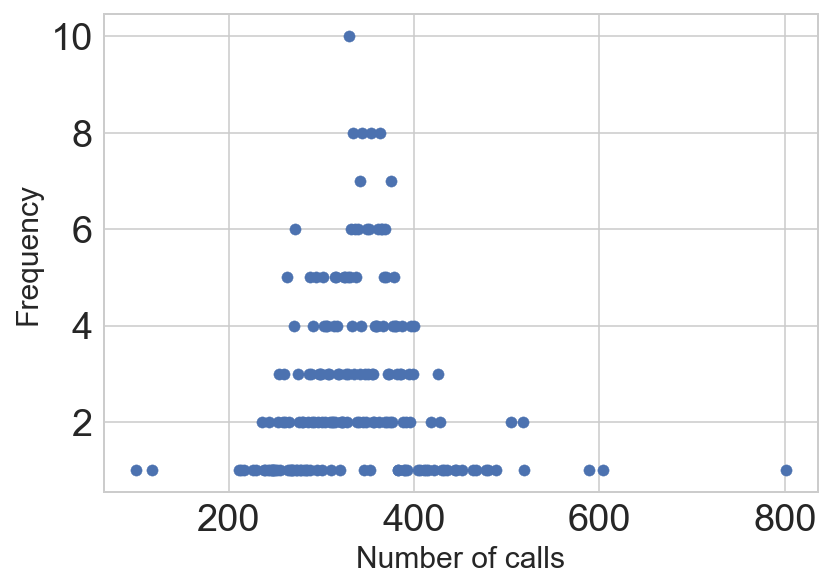

In [23]:
# Determining whether or not the amount of calls per day is normally distributed (Amount of
# calls per day vary around some range)
test_stat, p_val = normaltest(freqTimes.value_counts().index)
if(p_val < 0.05):
    print("Data is not normally distributed. P value: " + str(p_val))
else:
    print("Dat is normally distributed.")

f1 = plt.figure()

ax2 = f1.add_subplot(111)
ax2.set_xlabel('Number of calls', fontsize = 15)
ax2.set_ylabel('Frequency', fontsize = 15)
plt.scatter(freqTimes.value_counts().index, freqTimes.value_counts())

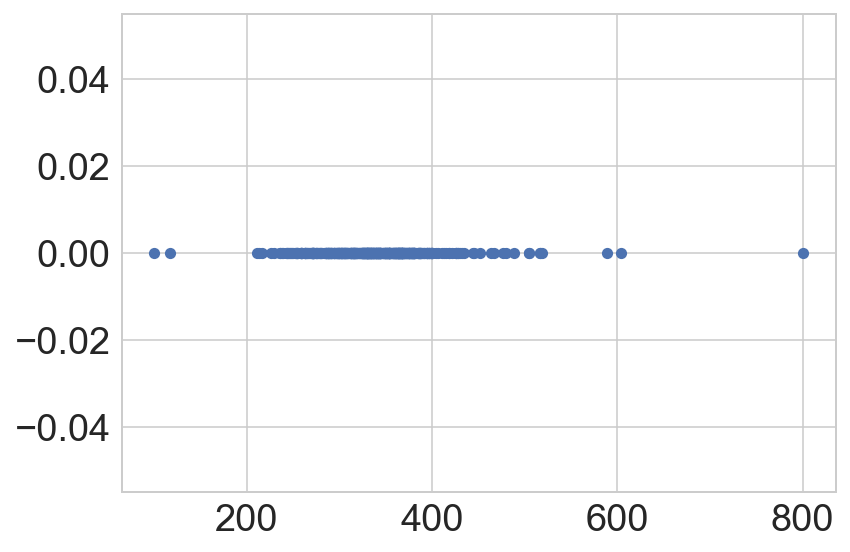

In [24]:
plt.plot(freqTimes, np.zeros_like(freqTimes), "o")

From this , it is evident that the data is not normally distributed. However, the data does appear to have evidents in which most of the points fall into (from a cursory glance, this appears to from ~200  to ~550). We are going to try to find this extreme values and see if there is any correlation between those extreme values and the days in which they fall into

In [25]:
freqTimes.describe()

count    491.000000
mean     337.586558
std       58.007865
min      100.000000
25%      303.500000
50%      337.000000
75%      367.000000
max      801.000000
Name: Date, dtype: float64

In [26]:
#Finding the IQR
upper_quartile = 367
lower_quartile = 303
iqr = upper_quartile - lower_quartile
iqr

64

Since our data is not normally distributed, we will be using the method devised by John Tuckey to find outliers, which is finding things that are more than 1.5 times the inter-quartile range away from the 1st and 3rd quartiles.

In [27]:
#setting our critical value.
crit_value = 1.5*iqr
crit_value

96.0

In [28]:
#Getting average number of calls per day
average_calls = freqTimes.mean()
average_calls

337.5865580448065

In [29]:
#Finding all values outside of two standard devs
upper_bound = upper_quartile + crit_value
lower_bound = lower_quartile - crit_value

print(upper_bound, lower_bound)

463.0 207.0


In [30]:
extreme_values = []
for i in range(len(freqTimes)):
    if(freqTimes[i] > upper_bound or freqTimes[i] < lower_bound):
        extreme_values.append(freqTimes.index[i])
extreme_values = pd.Series(extreme_values)
extreme_values

0     2015-12-10
1     2016-01-12
2     2016-01-23
3     2016-01-24
4     2016-01-25
5     2016-02-16
6     2016-02-24
7     2016-04-03
8     2016-05-01
9     2016-07-25
10    2016-11-29
11    2017-01-11
12    2017-01-23
13    2017-02-09
14    2017-02-13
dtype: object

Now that we have all of the abnormal days found, we will plot them to see if they are around the same point

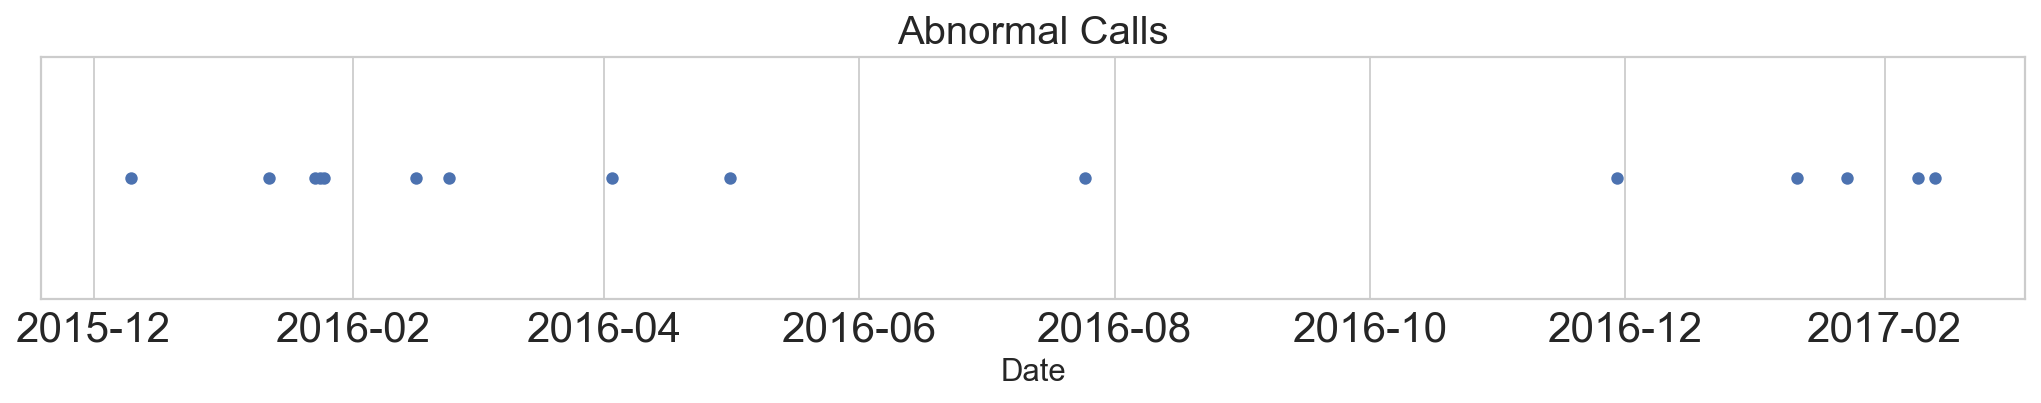

In [31]:
f2 = plt.figure(figsize=(16, 2), dpi=80, facecolor='w', edgecolor='k')


ax2 = f2.add_subplot(111)

ax2.yaxis.set_visible(False)
ax2.set_title("Abnormal Calls", fontsize = 18)
ax2.set_xlabel('Date', fontsize = 14)

plt.plot(extreme_values, np.zeros_like(extreme_values), "o")

# Conclusions

Looking at the days with the abnormal calls, there were very few during the 2016 election season, with the only day relevant to the elction being July 25, 2016, the first day of the Democratic National Convention. There were 505 calls on this day, which is 2.886 standard deviations away from the mean. It is likely that this day had such a spike in this dataset due to its basis in Pennsylvania, which is where the DNC was held last year. However, due to the fact that this is the only election-related date, it seems that the high volume of calls on that date was due primarily to random chance and had little to do with the election.

### Dates that we found + Pennsylvania-related events that happened on those days

12/10/2015 - Abnormally low amount of calls; probably was not any specific event that caused this

1/12/2016 - Couldn't find anything specific

1/23/2016 through 1/25/2016 - United States Blizzard

2/16/2016 - Filing deadline for candidacy in 2016 Pennsylvania Congressional Election; Olympia Snowstorm reaches Pennsylvania 

2/24/2016 - Tornadoes hit Bradford and Lancaster counties in Pennsylvania

4/3/2016 - WrestleMania 32 [In Texas, probably did not affect Pennsylvania]; Amtrak train derails in Chester, Pennsylvania

5/1/2016 - Abnormally low amounts of calls; probably was not any specific event that caused this

7/25/2016 - Start of Democratic National Convention in Philadelphia, PA. 

11/29/2016 - Villanova Wildcats beat the Penn Quakers (Basketball team of University of Pennsylvania) [This is most likely a spurious connection]

1/11/2017 - Temperature in Philadelphia rises (14 degrees F above both the average high and low)

1/23/2017 (3 days after Trump is innaugurated) - Couldn't find anything specific, likely snowfall

2/9/2017 - Snowfall throughout most of Pennsylvania

2/13/2017 - Red Hot Chili Peppers perform at Wells Fargo Stadium in Philadelphia

Looking at the dates and the events that occured on them, it seems that there is a stronger correlation between snowfall and 911 calls than there was for political events and 911 calls. By the numbers, only 2 of the 15 outlier days we found had some sort of political leaning to them while about 7 of the days had something to do with the weather. Due to this, we fail to reject the null hypothesis that says that 911 calls were not affected by the 2016 election. 